# 第6回レポート課題


提出物：

- report06.ipynb（このノートブック）
  - ノートブックに直接コードを書いて実行できる
  - コードを実行した結果の状態で保存して提出すること
- レポート
  - 形式：A4縦，PDFファイル1つ（複数ファイルやwordファイルは受け付けない）
  - 1ページ目冒頭に，氏名・学生番号・所属学科/分野/コース・授業名・課題名・出題授業日を明記すること
  - 各課題（「課題6-01」「課題6-02」など）を区別できるようにすること
  - 含める内容
    - コードの抜粋とその説明
    - 実行結果（テキスト出力，プロット等）とその説明
    - 各課題で指定された内容とその説明
  - レポート作成上の注意事項:
    - **レポートにはできるだけ丁寧な説明を含めること**



In [ ]:
# Google Colabの場合にはこのセルを実行すること．
!mkdir src06
!wget https://www.dropbox.com/s/p877v35jrjouaif/hand-written-6.dat?dl=0 -O src06/hand-written-6.dat
!wget https://www.dropbox.com/s/kxy3iojopg52diq/iris.csv?dl=0 -O src06/iris.csv

# 主成分分析


以下ではアヤメ(iris)のデータと，`6`の画像データを扱う．
データ行列$\boldsymbol{X}$には以下のようにデータが保存されている．

$$
\begin{align*}
 \boldsymbol{X} = 
 \begin{bmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
  \vdots  & \vdots  & \vdots & \vdots \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,d}
 \end{bmatrix}
\end{align*}
$$

$n$がサンプル数であり，$d$が変数の数である．

`src/iris.csv`にはアヤメ(iris)のデータが保存されている．4種類の属性が4次元ベクトルとして，150サンプル分保存されている．

In [14]:
import pandas as pd

df = pd.read_csv('src06/iris.csv', header=None, sep=' ', index_col=False, 
    names=['がく片の長さ(cm)', 'がく片の幅(cm)', '花の長さ(cm)', '花の幅(cm)', '品種'])
df

# 品種
# 1: Iris-setosa, 2: Iris-versicolor, 3: Iris-virginica

,がく片の長さ(cm),がく片の幅(cm),花の長さ(cm),花の幅(cm),品種
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


`src06/hand-written-6.dat`には手書き数字の「6」の$16 \times 16$画像が，256次元のベクトルとして664枚分保存されている．

In [1]:
import pandas as pd

df = pd.read_csv('src06/hand-written-6.dat', header=None, sep=' ', index_col=False)
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0.0,0.0,0.0000,0.0000,0.1845,0.9310,0.4165,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.000,0.0000,0.0,0
1,0,0,0,0.0,0.0,0.3015,0.9915,0.2325,0.0000,0.0000,...,0.9015,0.5075,0.0690,0.0645,0.2815,0.0000,0.000,0.0000,0.0,0
2,0,0,0,0.0,0.0,0.0000,0.0000,0.0000,0.3650,0.9865,...,0.4795,0.8140,0.7865,0.4080,0.0545,0.0000,0.000,0.0000,0.0,0
3,0,0,0,0.0,0.0,0.0000,0.0000,0.1495,0.8540,0.1390,...,0.2605,0.9415,0.3755,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0
4,0,0,0,0.0,0.0,0.0000,0.0000,0.0000,0.5115,0.8910,...,0.1365,0.8050,1.0000,0.7360,0.0680,0.0000,0.000,0.0000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0.0,0.0,0.0000,0.0000,0.0000,0.3550,0.9860,...,1.0000,0.7865,0.7645,0.5665,0.1740,0.0000,0.000,0.0000,0.0,0
660,0,0,0,0.0,0.0,0.0000,0.0000,0.2005,0.6545,1.0000,...,0.7140,0.9485,1.0000,1.0000,0.9700,0.6165,0.263,0.0295,0.0,0
661,0,0,0,0.0,0.0,0.0000,0.0095,0.2140,0.8435,0.7960,...,0.9965,0.6345,0.2475,0.0190,0.0000,0.0000,0.000,0.0000,0.0,0
662,0,0,0,0.0,0.0,0.0000,0.0395,0.3755,0.7300,0.9130,...,0.0530,0.5690,0.9980,0.8380,0.3095,0.0000,0.000,0.0000,0.0,0


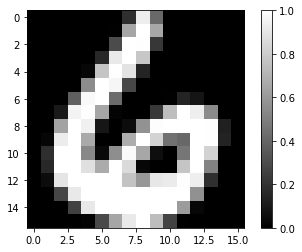

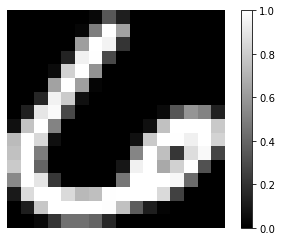

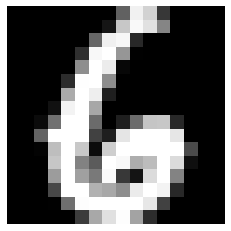

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(df.iloc[0].to_numpy().reshape(16, 16), cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(df.iloc[32].to_numpy().reshape(16, 16), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

plt.imshow(df.iloc[75].to_numpy().reshape(16, 16), cmap='gray')
plt.axis('off')
plt.show()


## 課題6-01：分散共分散行列の計算


以下に分散共分散行列$\boldsymbol{S}$を計算する関数`cov`を作成せよ．
分散共分散行列$\boldsymbol{S}$の定義はスライドにある通り．
要素$S_{i,j}$はスカラー表記で以下のように書くこともできる:
$$
\begin{align*}
 S_{i,j} = 
 \frac{1}{n}
 \sum_{k = 1}^n (x_{k,i} - \bar{x}_i) (x_{k,j} - \bar{x}_j),
\end{align*}
$$
ただし，$\bar{x}_i$は平均ベクトル$\bar{\boldsymbol{x}}$の$i$番目の要素である．

- レポートに含める内容:
  - 得られた分散行列行列




In [2]:
import numpy as np


def cov(X):

    n, d = X.shape

    # 0で初期化
    mean = np.zeros(d)  # 平均ベクトル
    S = np.zeros((d, d))  # 共分散行列


    # Step1: 平均ベクトルを求める  
    # - Xの「行」を全て足して，行数で割った値が'mean'に入る
    # - 足す部分は愚直には二重for文で実行できる
    # - その後にnで割り算を行う
    for i in range(n):
        for j in range(d):
            mean[j] += 0  # これはダミーです


    # Step2: 分散共分散行列を計算する
    # - 愚直には三重for文で実行できる 
    # - その後にnで割り算を行う
    for i in range(d):
        for j in range(d):
            for k in range(n):
                S[i, j] += 0  # これはダミーです


    return S



data = np.loadtxt('src06/iris.csv')
X = data[:, :-1]  # 最後の列（品種）以外をXへ代入
n, d = X.shape  # n: 行数（サンプル数），d: 列数（変数の数）


print("Covariance matrix of iris dataset (n = {}, d = {}):".format(n, d))
print(cov(X))



Covariance matrix of iris dataset (n = 150, d = 4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## 課題6-02：irisデータの主成分分析

`src/iris.csv`にはアヤメ(iris)のデータが保存されている．4種類の属性が4次元ベクトルとして，150サンプル分保存されている．

irisデータに主成分分析を行い，第1主成分，第2主成分のスコアを求め，スコアを並べた$n \times 2$の行列$\boldsymbol{Y}$を作成せよ．

また第1・第2主成分の寄与率と累積寄与率も求めること．

課題作成の手順は以下の通りとなる

0. 分散共分散行列を関数`cov`で計算する．課題6-01で作成したものを利用する．
1. 固有値分解を行う関数`np.linalg.eigh()`を用いて固有値・固有ベクトルの計算を行う．
   この関数は対称行列を受け取って，昇順にならんだ固有値と，各列がその順で固有値に対応する固有ベクトルからなる行列を返す．
3. 固有値から寄与率を計算する．
2. 寄与率から累積寄与率を計算する．
3. $\boldsymbol{X}$を次元削減した$\boldsymbol{Y}$を計算する．


- レポートに含める内容:
  - 寄与率と累積寄与率
  - 第1主成分，第2主成分上の散布図


In [2]:
import numpy as np

def cov(X):

    n, d = X.shape

    #
    # 0. 課題１で作成したものをそのまま使う
    #
    S = np.zeros((n, n))  # これはダミーです

    return S



data = np.loadtxt('src06/iris.csv')  # ファイルを変数dataに読み込む
X = data[:, :-1]  # 最後の列（品種）以外をXへ
n, d = X.shape

S = cov(X)  # 共分散行列の計算

w, V = np.linalg.eigh(S)  # 固有値wと固有ベクトルVの計算
w = w[::-1]  # wの要素の順序を逆順に入れ替える
V = V[:, ::-1]  # Vの列の順序を逆順に入れ替える


# wには降順に固有値が保存されている
print("Eigenvalues:")
print(w)

# Vには左の列から順番に大->小の固有値に対応する固有ベクトルが保存されている
print("Eigenvectors:")
print(V)



#
# 1. ここに各主成分方向の寄与率を表示するコードを作成
# 

contrib = 0  # これはダミーです
print("contribution rates:", contrib)


#
# 2. ここで累積寄与率を計算し表示
# 

acc_contrib = 0  # これはダミーです
print("accumulated contribution rates:", acc_contrib)



# スライシングで右からq列を抜き出す
# 以下のコードは，Vの右から1列目と2列目（第1・２固有ベクトル）をWに代入
q = 2
W = np.zeros((d, q))
W[:, 0] = V[:, 0]
W[:, 1] = V[:, 1]




#
# 3. 次元削減後の空間の値Y (n x 2 行列)を計算するコードを作成
#

Y = np.zeros((n, 2))  # これはダミーです




Eigenvalues:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Eigenvectors:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'


plt.plot(range(d), contrib, marker="o")
plt.ylabel('contribution rate')
plt.xticks(np.arange(0, d, 1))
plt.savefig('fig_report06-01-contrib.png')
plt.savefig('fig_report06-01-contrib.jpg')
plt.savefig('fig_report06-01-contrib.pdf')
plt.savefig('fig_report06-01-contrib.svg')
plt.show()


plt.plot(range(d), acc_contrib, marker="o")
plt.ylabel('accumurated contribution rate')
plt.xticks(np.arange(0, d, 1))
plt.savefig('fig_report06-01-acc_contrib.png')
plt.savefig('fig_report06-01-acc_contrib.jpg')
plt.savefig('fig_report06-01-acc_contrib.pdf')
plt.savefig('fig_report06-01-acc_contrib.svg')
plt.show()


plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel('1st principle component')
plt.ylabel('2nd principle component')
plt.title('Y without class colors')
plt.savefig('fig_report06-01-Y.png')
plt.savefig('fig_report06-01-Y.jpg')
plt.savefig('fig_report06-01-Y.pdf')
plt.savefig('fig_report06-01-Y.svg')
plt.show()


scatter = plt.scatter(Y[:, 0], Y[:, 1], c=data[:, -1])
plt.legend(*scatter.legend_elements(), title="spices")
plt.xlabel('1st principle component')
plt.ylabel('2nd principle component')
plt.title('Y with class colors')
plt.savefig('fig_report06-01-Y-with-color.png')
plt.savefig('fig_report06-01-Y-with-color.jpg')
plt.savefig('fig_report06-01-Y-with-color.pdf')
plt.savefig('fig_report06-01-Y-with-color.svg')
plt.show()



## 課題6-03：主成分分析: 手書き数字データ

`src06/hand-written-6.dat`には手書き数字の「6」の$16 \times 16$画像が，256次元のベクトルとして664枚分保存されている．

主成分分析を行い累積寄与率が90%を超える最小の次元まで削減し，その後，元の次元に復元するプログラムを作成せよ．

また第1・第2主成分の寄与率と累積寄与率も求めること．

- レポートに含める内容:
  - 最初の設定（`data\_index=0`）と，それ以外の復元前後の例を2つ以上（合計3つ以上）
  - 寄与率と累積寄与率
  - 90%の累積寄与率を達成する次元数
  - 第1主成分，第2主成分上の散布図
  - 第1から第4主成分ベクトルの画像としての可視化

In [ ]:
import numpy as np

def cov(X):

    n, d = X.shape

    #
    # 0. 課題１で作成したものをそのまま使う
    #
    S = np.zeros((n, n))  # これはダミーです

    return S



X = np.loadtxt('src06/hand-written-6.dat')  # ファイルを変数dataに読み込む
n, d = X.shape

S = cov(X)  # 分散共分散行列の計算(covの中身を作成)


# eig(S, eval, evec)
w, v = np.linalg.eigh(S)


#
# 1. ここに各主成分方向の寄与率を表示するコードを作成
# 

contrib = 0  # これはダミーです
print("contribution rates:", contrib)


#
# 2. ここで累積寄与率を計算し表示
# 

acc_contrib = 0  # これはダミーです
print("accumulated contribution rates:", acc_contrib)



#
# 累積寄与率を計算し, 90%を超える最小の次元数(q)を求める
#

q = 0  # 90%を超える最小の次元数
for k in range(d):
    if 0:  # これはダミーです
        q = k
        break
print("q", q)



#
# 行列Vの右からq列分の取ってくる（参考：課題06-02）
#
# スライシングで右からq列を抜き出す
W = np.zeros((d, q))
for i in range(q):
    W[:, i] = 0  # これはダミーです



#
# ここにYとXhatを計算するコードを作成
#
# Y(X.rows(),dim);
# Xhat(X.rows(),X.cols());

Y = np.zeros((n, q))
Xhat = np.zeros_like(X)


#
# プロット用に結果を保存
# 

data_index = 0  # 復元前後のデータを保存するインデックス




In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'



plt.plot(range(d), contrib, marker="o")
plt.ylabel('contribution rate')
plt.xticks(np.arange(0, d, 25))
plt.savefig('fig_report06-02-contrib.png')
plt.savefig('fig_report06-02-contrib.jpg')
plt.savefig('fig_report06-02-contrib.pdf')
plt.savefig('fig_report06-02-contrib.svg')
plt.show()




plt.plot(range(d), acc_contrib, marker="o")
plt.vlines(x=q, ymin=0, ymax=1)
plt.ylabel('accumurated contribution rate')
plt.xticks(np.arange(0, d, 25))
plt.savefig('fig_report06-02-acc_contrib.png')
plt.savefig('fig_report06-02-acc_contrib.jpg')
plt.savefig('fig_report06-02-acc_contrib.pdf')
plt.savefig('fig_report06-02-acc_contrib.svg')
plt.show()



fig, ax = plt.subplots()
ax.scatter(Y[:, 0], Y[:, 1])
ax.set_xlabel('1st principle component')
ax.set_ylabel('2nd principle component')
ax.axis('equal')
plt.show()




fig, ax = plt.subplots(1, 4, figsize=(20, 5), tight_layout=True)

for i, axis in enumerate(ax):
    im0 = axis.imshow(V[:, i].reshape(16, 16), cmap='coolwarm')
    fig.colorbar(im0, ax=axis)
    axis.set_title("{}-th eigenvector $w_{}$".format(i + 1, i + 1))
    axis.axis('off')
    axis.axis('equal')

plt.savefig('fig_report06-03_eigenvectors.jpg')
plt.savefig('fig_report06-03_eigenvectors.pdf')
plt.savefig('fig_report06-03_eigenvectors.png')
plt.show()




plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(Xhat[data_index].reshape(16, 16), cmap='gray')
plt.title("$\hat{}_{}$".format("x", data_index))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(X[data_index].reshape(16, 16), cmap='gray')
plt.title("${}_{}$".format("x", data_index))

plt.savefig('fig_report06-03_x{}.jpg'.format(data_index))
plt.savefig('fig_report06-03_x{}.pdf'.format(data_index))
plt.savefig('fig_report06-03_x{}.png'.format(data_index))
plt.show()